# Vizualizing phase trajectories of acceleration of different body movements

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.linalg as linalg
from sklearn.decomposition import PCA

from node.raw_data_loading import creat_time_series, set_data_types

In [54]:
plt.rcParams.update({
    'font.size': 10,           # Base font size (others are scaled relative to this)
    'axes.titlesize': 10,      # Axes title size
    'axes.labelsize': 10,      # x and y labels size
    'xtick.labelsize': 8,      # x-axis tick labels
    'ytick.labelsize': 8,      # y-axis tick labels
    'legend.fontsize': 8,      # Legend font size
    'figure.titlesize': 12,    # Figure title (suptitle) size
    'text.usetex': True,       # Use LaTeX rendering
    'font.family': 'serif'
})

In [55]:
DATA_DIR = "../../data/"
ACT_LABELS = ["dws","ups", "wlk", "jog", "std", "sit"]
NUM_PARTICIPANTS = 24
SAMPLES_PER_ACTIVITY = 3
TRIAL_CODES = {
    ACT_LABELS[0]:[1],
    ACT_LABELS[1]:[3],
    ACT_LABELS[2]:[7],
    ACT_LABELS[3]:[9],
    ACT_LABELS[4]:[6],
    ACT_LABELS[5]: [5]
}

PHASE_SPACE_DIM = 20

In [56]:
activity = "jog"
participant = 22

In [57]:
dt_columns = set_data_types(["rotationRate"])
act_labels = [activity]
trial_codes = [TRIAL_CODES[activity]]
# get magnitude of the acceleration for each participant
ts_df = creat_time_series(DATA_DIR, dt_columns, act_labels, trial_codes)

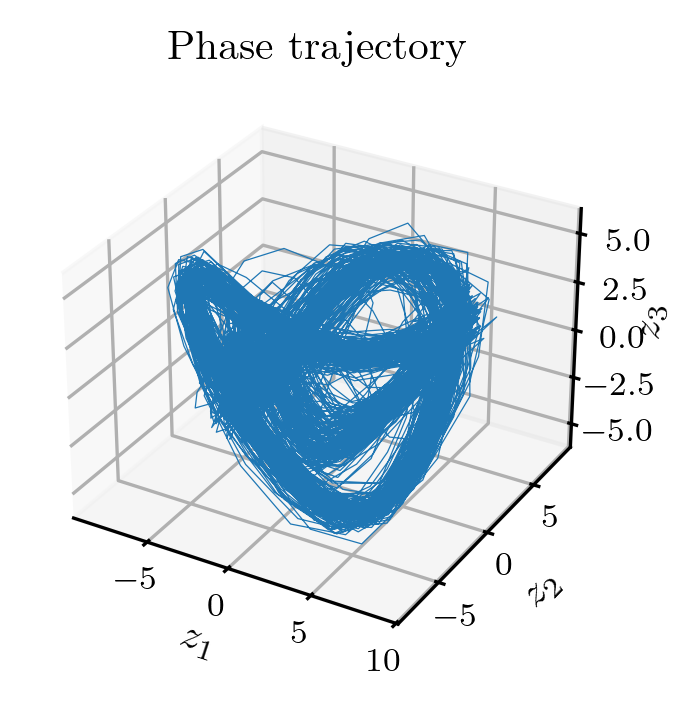

In [87]:
ts = ts_df.loc[ts_df["id"] == participant, ["rotationRate"]].values
# build trajectory matrix
traj_matrix = linalg.hankel(ts[:PHASE_SPACE_DIM], ts[PHASE_SPACE_DIM - 1:])
# cut dimensions for vizualization
if PHASE_SPACE_DIM > 3:
    traj_matrix = PCA(3).fit_transform(traj_matrix.T).T

traj_matrix = traj_matrix[:, ::1]

fig = plt.figure(figsize=(3.5, 2.5))
ax = fig.add_subplot(projection='3d')
ax.plot(*traj_matrix, linewidth=0.3)
ax.set_xlabel("$z_1$", labelpad=-9)
ax.set_ylabel("$z_2$", labelpad=-9)
ax.set_zlabel("$z_3$", labelpad=-10)
ax.tick_params(axis='x', which='major', pad=-4)  # x-axis
ax.tick_params(axis='y', which='major', pad=-4)  # x-axis
ax.tick_params(axis='z', which='major', pad=-1)  # x-axis
ax.set_title("Phase trajectory")
fig.savefig('plot1.svg', bbox_inches='tight', pad_inches=0.05)

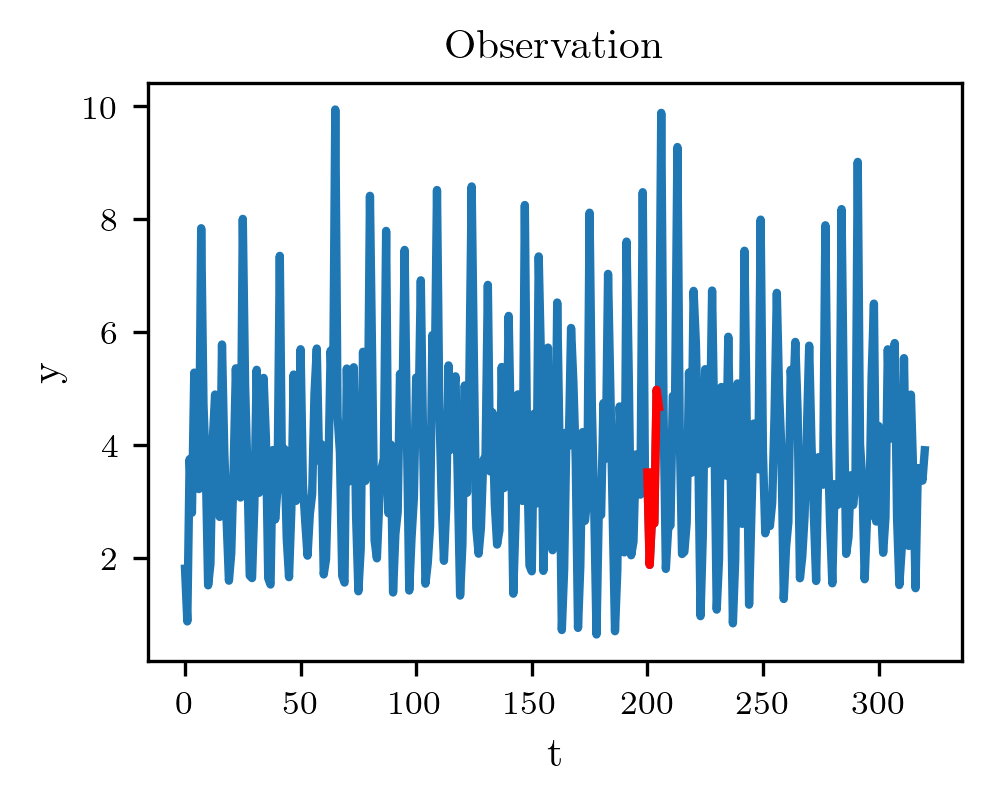

In [90]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
ts = ts_df.loc[ts_df["id"] == participant, ["rotationRate"]].values


ts = ts[::15]
ax.plot(ts)
ax.plot(np.arange(200, 206), ts[200:206], color="red")
ax.set_xlabel("t")
ax.set_ylabel("y")
ax.set_title("Observation")
fig.savefig('plot.svg', bbox_inches='tight', pad_inches=0.05)

Num outliers 1
Num outliers 0
Num outliers 0
Num outliers 0
Num outliers 15
Num outliers 2


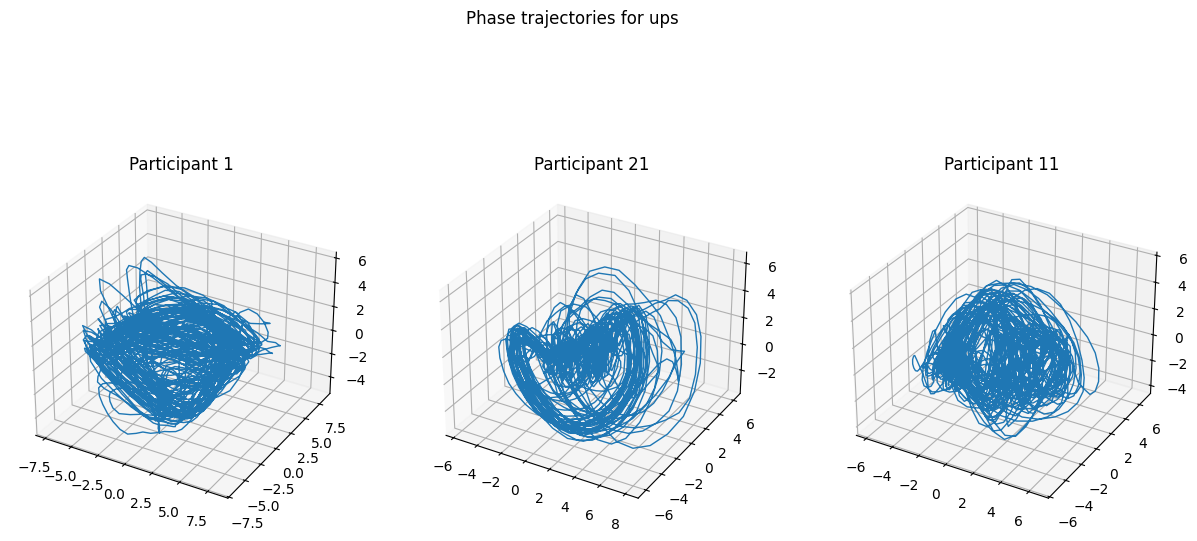

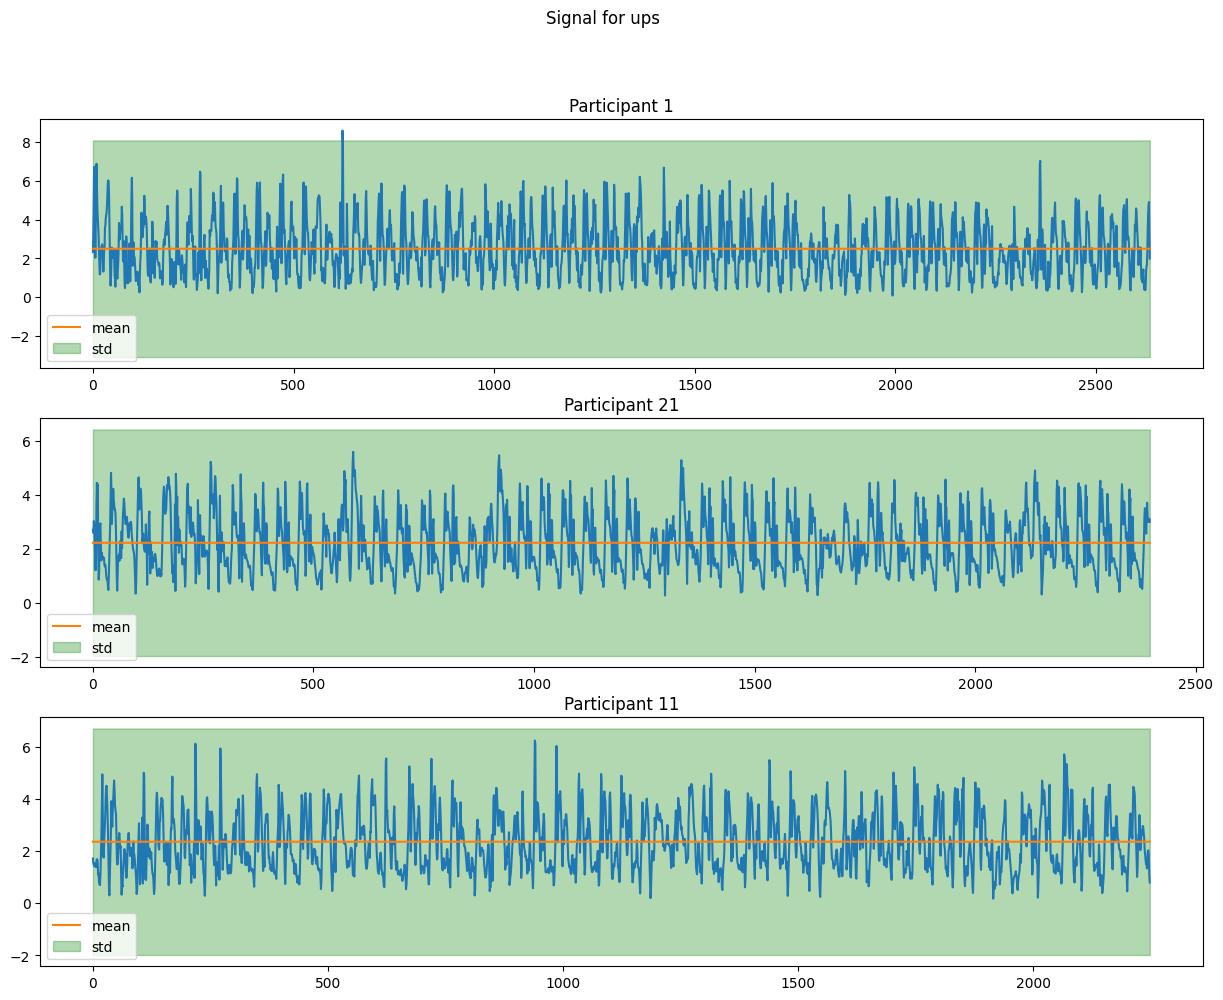

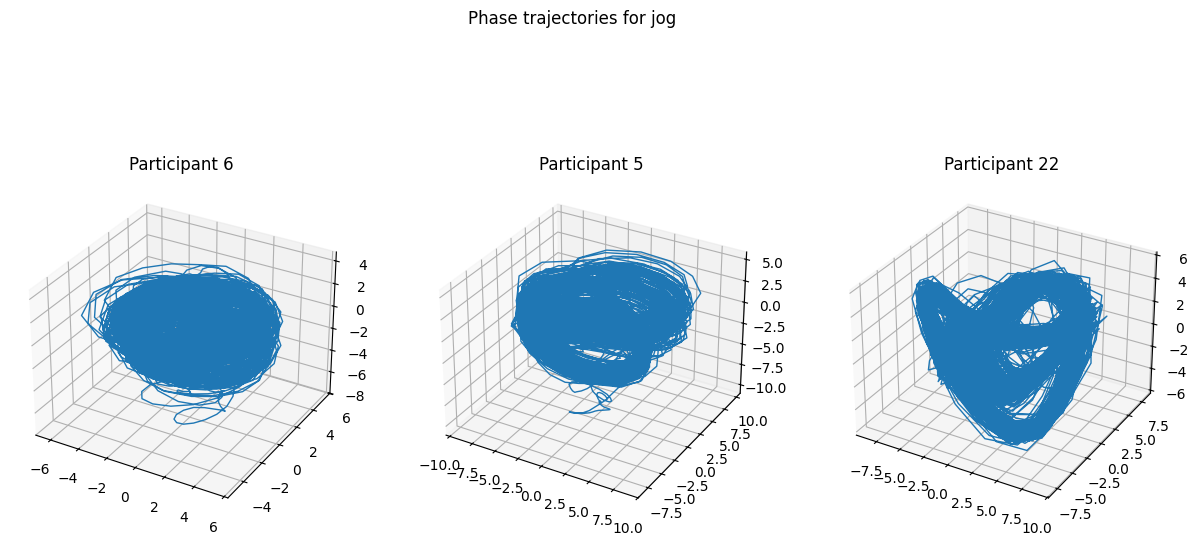

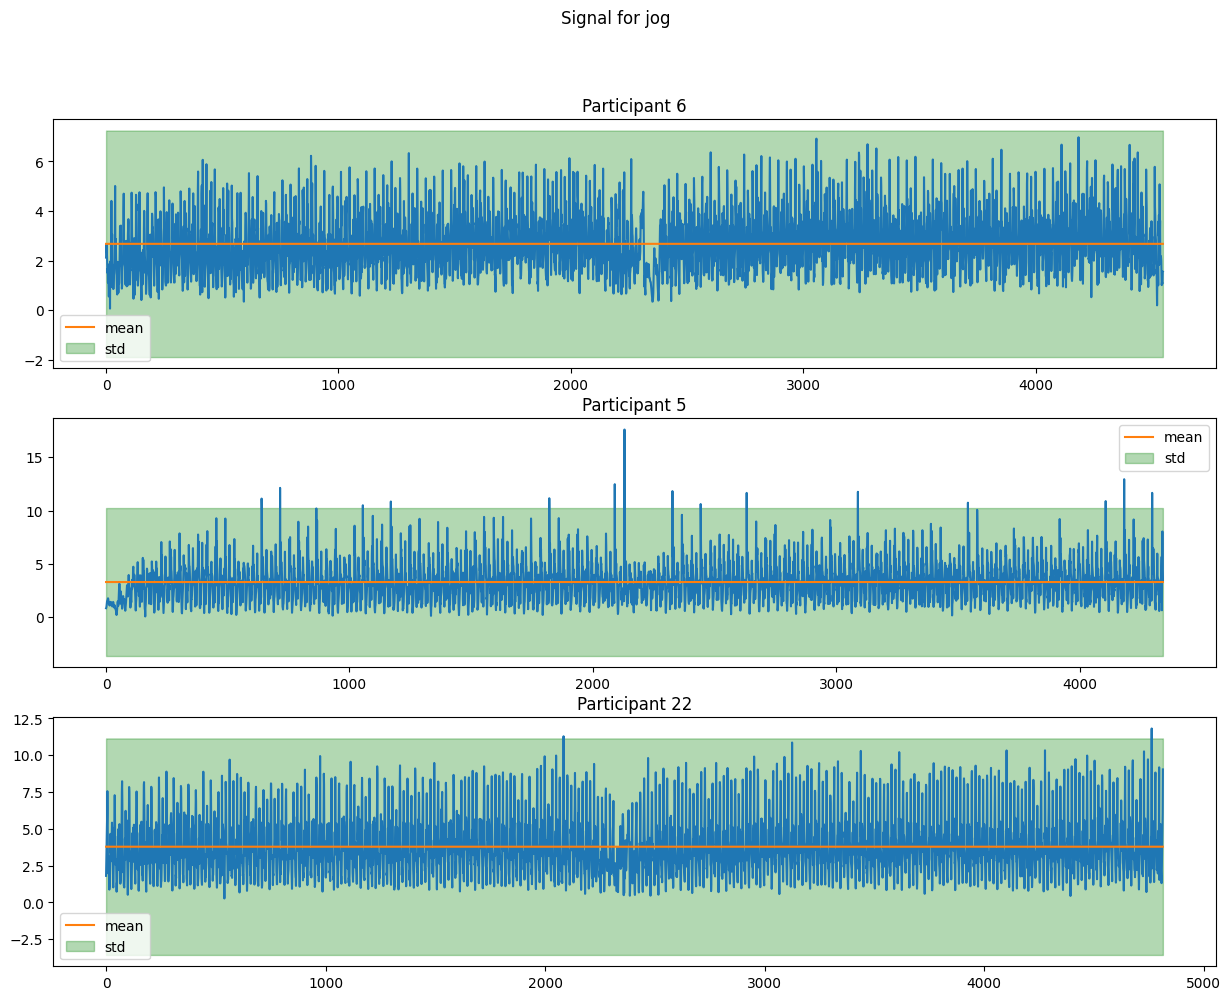

In [15]:
for activity in ACT_LABELS:
    dt_columns = set_data_types(["rotationRate"])
    act_labels = [activity]
    trial_codes = [TRIAL_CODES[activity]]
    # get magnitude of the acceleration for each participant
    ts_df = creat_time_series(DATA_DIR, dt_columns, act_labels, trial_codes)
    
    # choose 3 random participants
    participants = np.random.choice(np.arange(NUM_PARTICIPANTS), SAMPLES_PER_ACTIVITY, replace=False)

    fig_phase = plt.figure(figsize=(15, 7))
    fig_phase.suptitle(f"Phase trajectories for {activity}")
    
    for i in range(SAMPLES_PER_ACTIVITY):
        # get time series for current participant
        ts = ts_df.loc[ts_df["id"] == participants[i], ["rotationRate"]].values

        # build trajectory matrix
        traj_matrix = linalg.hankel(ts[:PHASE_SPACE_DIM], ts[PHASE_SPACE_DIM - 1:])
        # cut dimensions for vizualization
        if PHASE_SPACE_DIM > 3:
            traj_matrix = PCA(3).fit_transform(traj_matrix.T).T

        ax_phase = fig_phase.add_subplot(1, SAMPLES_PER_ACTIVITY, i + 1, projection='3d')
        ax_phase.plot(*traj_matrix, linewidth=1)
        ax_phase.set_title(f"Participant {participants[i]}")

    fig_ts = plt.figure(figsize=(15, 11))
    fig_ts.suptitle(f"Signal for {activity}")

    for i in range(SAMPLES_PER_ACTIVITY):
        # get time series for current participant
        ts = ts_df.loc[ts_df["id"] == participants[i], ["rotationRate"]].values

        mean = ts.mean()
        std = ts.std()

        std_mult = 4
        outliers = np.abs(ts - mean) > std_mult * std
        print("Num outliers", outliers.sum())

        ax_ts = fig_ts.add_subplot(SAMPLES_PER_ACTIVITY, 1, i + 1)

        ax_ts.plot(ts)
        ax_ts.plot(np.full(ts.size, mean), label="mean")
        ax_ts.fill_between(np.arange(ts.size), mean - std_mult * std, mean + std_mult * std, label="std", color="green", alpha=0.3)

        ax_ts.legend()
        ax_ts.set_title(f"Participant {participants[i]}")